In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/customer_booking.csv", encoding='latin1')

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
print(df.isnull())

       num_passengers  sales_channel  trip_type  purchase_lead  \
0               False          False      False          False   
1               False          False      False          False   
2               False          False      False          False   
3               False          False      False          False   
4               False          False      False          False   
...               ...            ...        ...            ...   
49995           False          False      False          False   
49996           False          False      False          False   
49997           False          False      False          False   
49998           False          False      False          False   
49999           False          False      False          False   

       length_of_stay  flight_hour  flight_day  route  booking_origin  \
0               False        False       False  False           False   
1               False        False       False  False        

In [ ]:
df['total_extras'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']
df['total_trip_length'] = df['purchase_lead'] + df['length_of_stay']

In [ ]:
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])

In [ ]:
print(df.head())
df.info()

   num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  total_extras  ...  \
0             5.52                 0             1  ...   
1             5.52                 0             0  ...   
2    

In [ ]:
'sales_channel_Internet' in df.columns

True

In [ ]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      8520
           1       0.47      0.19      0.27      1480

    accuracy                           0.85     10000
   macro avg       0.67      0.58      0.59     10000
weighted avg       0.81      0.85      0.82     10000


Confusion Matrix:
 [[8209  311]
 [1203  277]]


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print(f"Mean cross-validation recall: {scores.mean():.2f}")

Mean cross-validation recall: 0.10


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None], # None means no limit on depth
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'class_weight': ['balanced'] # Ensures the model pays more attention to the minority class
}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='recall', # Evaluate based on recall for the positive class
    cv=5,            # Use 5-fold cross-validation
    n_jobs=-1,       # Use all available CPU cores for speed
    verbose=2        # Display progress
)

# Fit the grid search to your training data
# Use your training data (X_train, y_train) which may or may not be resampled depending on your approach
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=2)

In [ ]:
# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Print the best score achieved with these parameters
print("Best Cross-validation Score (Recall): ", grid_search.best_score_)

# The best model can be accessed like this
best_model = grid_search.best_estimator_

Best Parameters:  {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 100}
Best Cross-validation Score (Recall):  0.7489190992493745


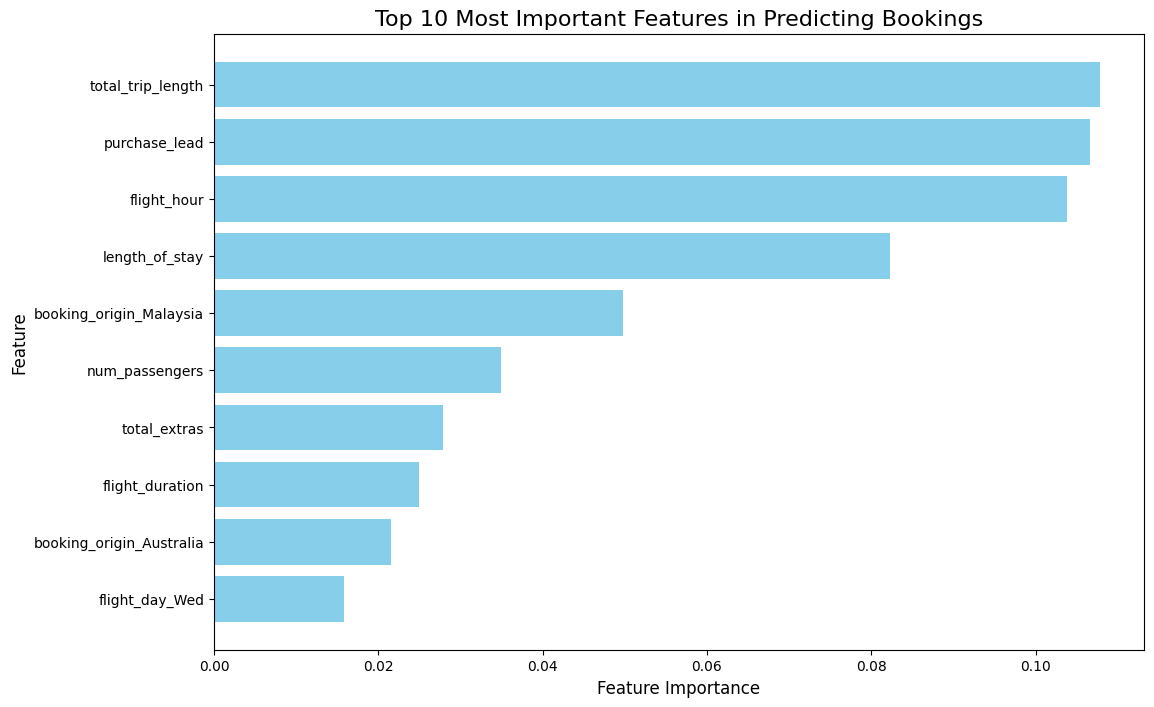

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # You may need this for more robust training

# Assuming 'df' is your DataFrame and 'bookings' is the target column
# If your data needs preprocessing (e.g., one-hot encoding for categorical variables), do it here.
# df = pd.get_dummies(df, columns=['some_categorical_column'])

# 1. Split data into features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# 2. Train the model
# For a more robust model, consider splitting the data into train/test sets.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X, y) # or best_model.fit(X_train, y_train)

# 3. Get feature importances from the trained model
importances = best_model.feature_importances_

# Get the feature names from the DataFrame's columns
feature_names = X.columns

# Create a DataFrame to hold features and their importance scores
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# 4. Visualize the top 10 most important features
plt.figure(figsize=(12, 8))
plt.barh(importance_df['feature'].head(10), importance_df['importance'].head(10), color='skyblue')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Top 10 Most Important Features in Predicting Bookings", fontsize=16)
plt.gca().invert_yaxis() # To display the highest importance at the top
plt.show()

In [ ]:
# Save the plot as a PNG file
plt.savefig("feature_importance_chart.png", bbox_inches='tight')
print("Chart saved as feature_importance_chart.png")

Chart saved as feature_importance_chart.png


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Define Top Features and Filter Data (Based on your visualization) ---
# Use the top 10 features from your bar chart
top_10_features = [
    'total_trip_length',
    'purchase_lead',
    'flight_hour',
    'length_of_stay',
    'booking_origin_Malaysia',
    'num_passengers',
    'total_extras',
    'flight_duration',
    'booking_origin_Australia',
    'flight_day_Wed'
]

# Assuming X_train, X_test, y_train, y_test are already defined
X_train_final = X_train[top_10_features]
X_test_final = X_test[top_10_features]


# --- 2. Train the Final Optimized Model ---
print("Training Final Optimized Model...")

# Use the Best Parameters found by GridSearchCV
final_model = RandomForestClassifier(
    n_estimators=100,          # from best_params_
    max_depth=10,              # from best_params_
    min_samples_leaf=4,        # from best_params_
    class_weight='balanced',   # CRITICAL: Solves the imbalance problem
    random_state=42
)

# Train on the top features (no need for SMOTE since class_weight is used)
final_model.fit(X_train_final, y_train)


# --- 3. Final Evaluation ---
print("\n--- Final Optimized Model Evaluation on Test Set ---")

# Make predictions on the filtered test set
y_pred_final = final_model.predict(X_test_final)

print("Classification Report:\n", classification_report(y_test, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

Training Final Optimized Model...

--- Final Optimized Model Evaluation on Test Set ---
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78      8520
           1       0.27      0.68      0.38      1480

    accuracy                           0.68     10000
   macro avg       0.60      0.68      0.58     10000
weighted avg       0.83      0.68      0.72     10000


Confusion Matrix:
 [[5789 2731]
 [ 478 1002]]
